In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 한글 폰트
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
plt.style.use('fivethirtyeight')

# data import
data = pd.read_csv('d:/temp/titanic_train.csv')


def preprocess_data(df):
    df['Embarked'].fillna('S', inplace=True)

    df['Embarked_clean'] = df['Embarked'].astype('category').cat.codes
    df['Family'] = 1 + df['SibSp'] + df['Parch']
    df['Solo'] = (df['Family'] == 1)
    df['FareBin'] = pd.qcut(df['Fare'], 5)
    
    df['FareBin'].value_counts()
    df['Fare_clean'] = df['FareBin'].astype('category').cat.codes
    
    df['Fare_clean'].value_counts()
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    df['Title'].value_counts()
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

    df['Title'].value_counts()
    
    df['Title_clean'] = df['Title'].astype('category').cat.codes
    df['Age'].isnull().sum()
    
    df["Age"].fillna(df.groupby("Title")["Age"].transform("median"), inplace=True)
    df.loc[ df['Age'] <= 10, 'Age_clean'] = 0
    df.loc[(df['Age'] > 10) & (df['Age'] <= 16), 'Age_clean'] = 1
    df.loc[(df['Age'] > 16) & (df['Age'] <= 20), 'Age_clean'] = 2
    df.loc[(df['Age'] > 20) & (df['Age'] <= 26), 'Age_clean'] = 3
    df.loc[(df['Age'] > 26) & (df['Age'] <= 30), 'Age_clean'] = 4
    df.loc[(df['Age'] > 30) & (df['Age'] <= 36), 'Age_clean'] = 5
    df.loc[(df['Age'] > 36) & (df['Age'] <= 40), 'Age_clean'] = 6
    df.loc[(df['Age'] > 40) & (df['Age'] <= 46), 'Age_clean'] = 7
    df.loc[(df['Age'] > 46) & (df['Age'] <= 50), 'Age_clean'] = 8
    df.loc[(df['Age'] > 50) & (df['Age'] <= 60), 'Age_clean'] = 9
    df.loc[ df['Age'] > 60, 'Age_clean'] = 10

    
    df['Cabin'].str[:1].value_counts()

    mapping = {
        'A': 0,
        'B': 1,
        'C': 2,
        'D': 3,
        'E': 4,
        'F': 5,
        'G': 7,
        'T': 8
    }
    df['Cabin_clean'] = df['Cabin'].str[:1]
    df['Cabin_clean'] = df['Cabin_clean'].map(mapping)
    df['Cabin_clean'] = df.groupby('Pclass')['Cabin_clean'].transform('median')

preprocess_data(data)

def view_graph(df , col, w=15,h=7):
    # data_mean을 계산하기 전에 myparam이 데이터프레임에 있는지 확인
    if col not in df.columns:
        print(f"Error: Column '{col}' not found in DataFrame.")
        return


    data_mean = df.groupby(col)[['Survived']].mean().reset_index()
    melt_df = data_mean[[col, "Survived"]]

    month_all_mean_long = pd.melt(
        melt_df, 
        id_vars=[col],
        value_vars=['Survived'],
        var_name='user_type',
        value_name='average_count'
    )

    plt.figure(figsize=(w,h)) 
    ax = sns.barplot(
        x=col,
        y='average_count',
        hue='user_type',
        data=month_all_mean_long
    )
    
    # --- 바 차트 위에 숫자 표시 및 겹침 방지 ---
    for cont in ax.containers:
        ax.bar_label(cont, fmt="%.1f", label_type="edge", fontsize=8, padding=3)
    # --- 숫자 표시 끝 ---

    plt.title(col + '/생존율')
    plt.xlabel(col)
    plt.ylabel('생존율')
    plt.tight_layout()
    plt.show()


C:\Users\nabid\AppData\Local\Temp\ipykernel_27544\357373365.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S', inplace=True)
C:\Users\nabid\AppData\Local\Temp\ipykernel_27544\357373365.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

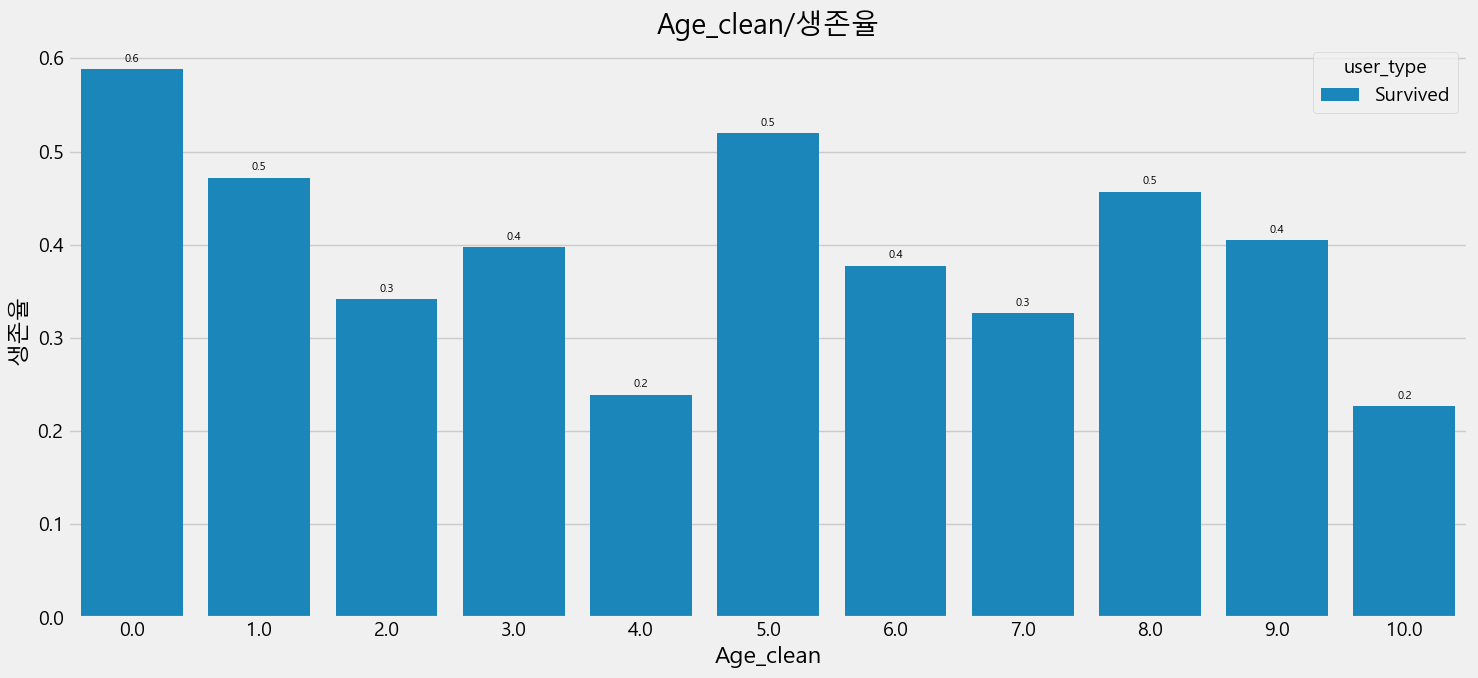

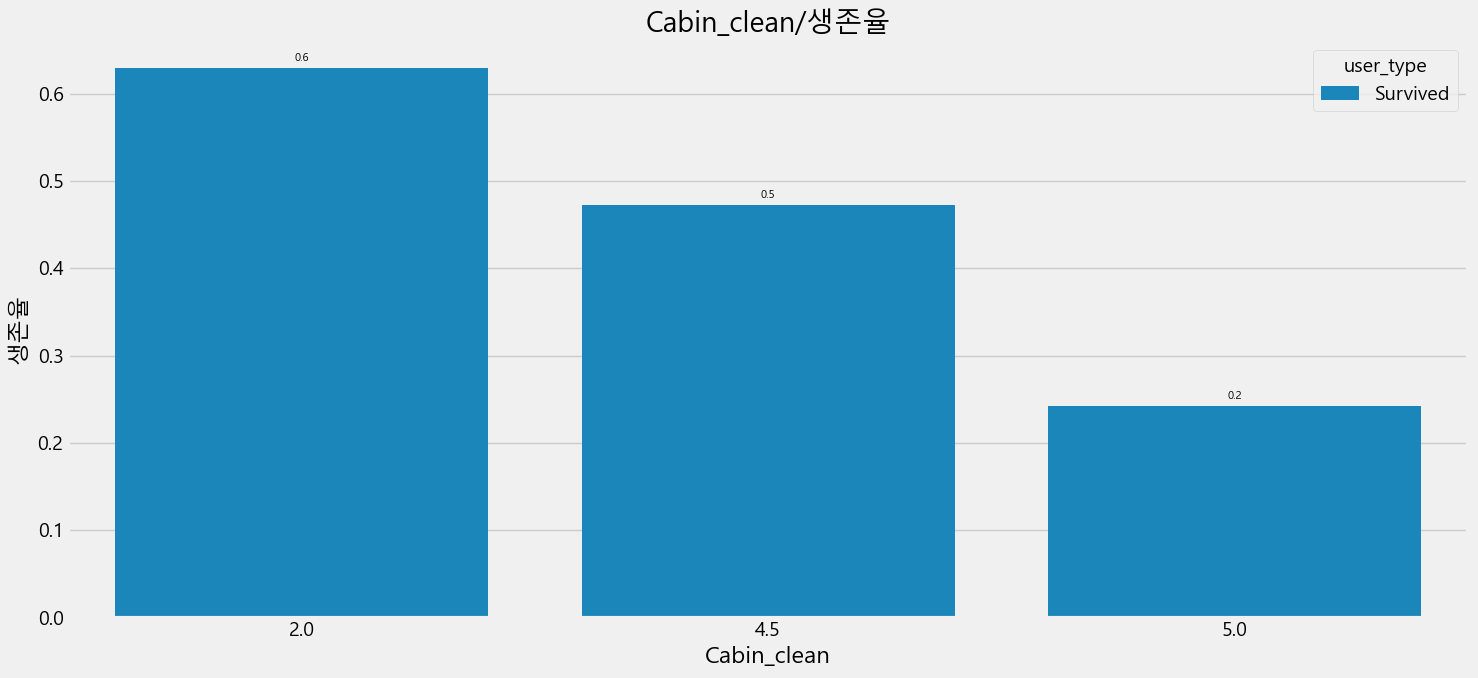

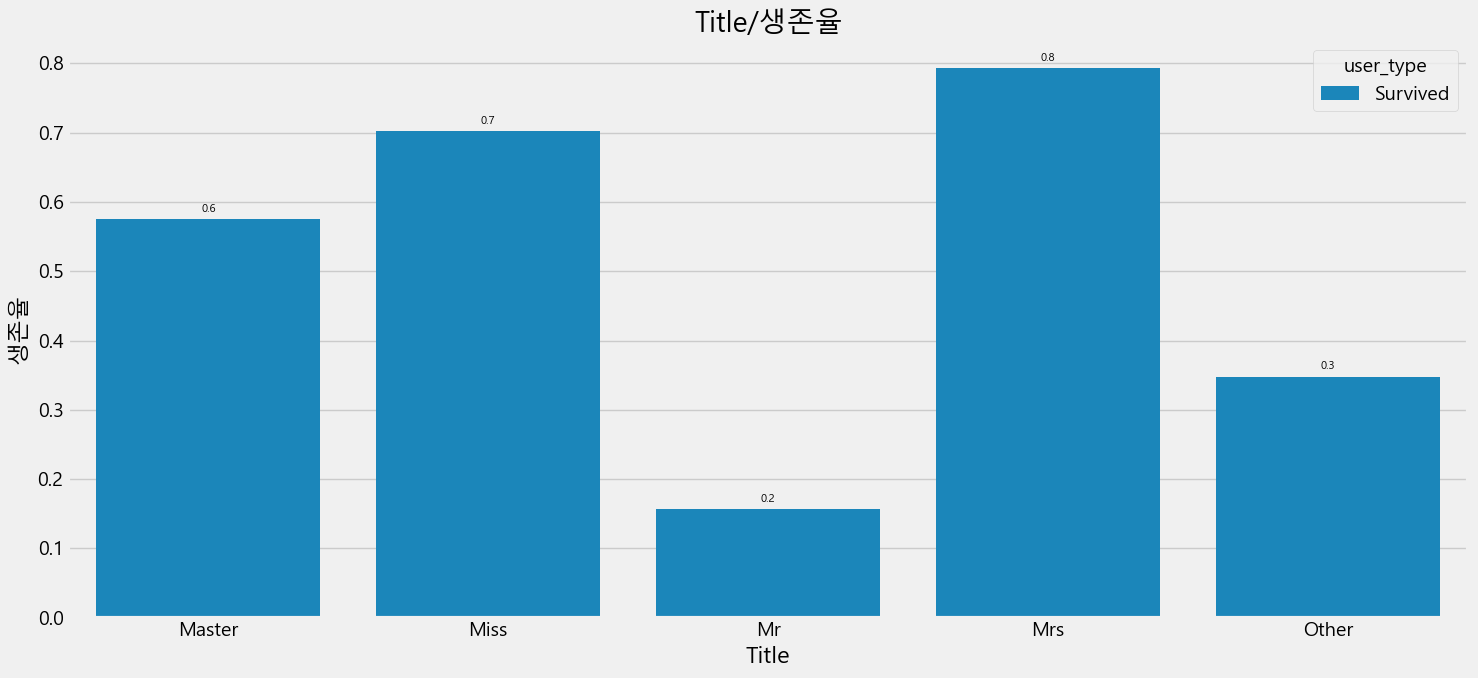

In [2]:
view_graph(data,"Age_clean")
view_graph(data,"Cabin_clean")
view_graph(data,"Title")
